In [47]:
!pip install librosa
!pip install midiutil

In [131]:
import librosa
import numpy as np
import pandas as pd
import math
audio, sr = librosa.load("Misirlou.wav", sr = 16000)

In [133]:
spectrogram = librosa.stft(audio, n_fft=2048, hop_length=256, center=False, win_length=2048) 
M = abs(spectrogram)
phase = spectrogram/(M + 2.2204e-16)

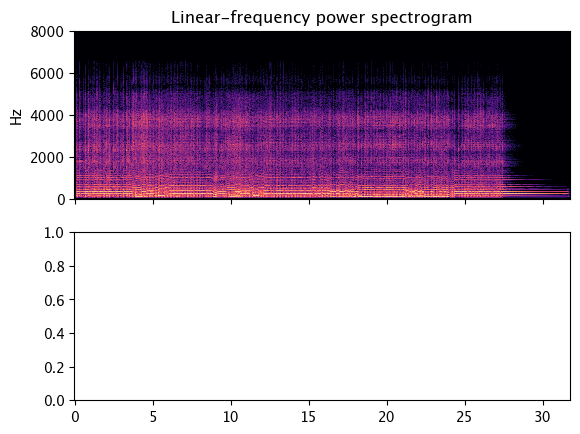

In [135]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

In [137]:
file_paths = [
    'notes_scale/0.wav',
    'notes_scale/1.wav',
    'notes_scale/2.wav',
    'notes_scale/3.wav',
    'notes_scale/4.wav',
    'notes_scale/5.wav',
    'notes_scale/6.wav'
]
def process_wav_librosa(file_path):
    data, rate = librosa.load(file_path, sr=16000)
    

    S = abs(librosa.stft(data,n_fft=2048, hop_length=256, center=False, win_length=2048))
    

    middle = S[:, int(math.ceil(S.shape[1]/2))]
    middle[middle < (max(middle)/100)] = 0
    middle = middle/np.linalg.norm(middle)
    
    return middle

spectrogram_vectors_librosa = [process_wav_librosa(file_path) for file_path in file_paths]


In [139]:
Notes=np.array(spectrogram_vectors_librosa)
Notes=Notes.T

In [141]:
X= np.dot(Notes.T,Notes)

In [143]:
Y=np.dot(np.linalg.inv(X),Notes.T)

In [145]:
W=np.dot(Y,M)

In [147]:
W.shape

(7, 1978)

In [157]:
newDataset = M-np.dot(Notes,W)
finalDataset = np.linalg.norm(newDataset, 'fro')**2
errorValue = np.sum((newDataset) ** 2)
print(finalDataset)

4278239.777587891


In [151]:
df = pd.DataFrame(W.T, columns=['Note1', 'Note2', 'Note3','Note4','Note5','Note6','Note7'])  

df.to_csv('problem1.csv', index=False)  

print("Array saved to 'output.csv'")

Array saved to 'output.csv'


In [155]:
import soundfile as sf
import IPython.display as ipd
W[W < 0] = 0 

M_hat = Notes @ W 
M_hat_spectogram = M_hat * np.exp(1j*phase) 

Y_hat = librosa.istft(M_hat_spectogram, hop_length=256, win_length=2048, center=False)
print(Y_hat)

sf.write('resynthensized_proj.wav', Y_hat, 16000)
ipd.Audio('resynthensized_proj.wav', rate=16000)

[   0.        458.7943    113.561424 ...  540.7506   1222.5945
 4876.9067  ]
